In [2]:
import pandas as pd
import numpy as np
from joblib import load
import seaborn as sns
import random
import shutil
import os

/home/saif/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


[0.61202821 0.61481252 0.6187846  0.59365798 0.60424212 0.59535048
 0.57699893 0.62226058 0.68039516 0.74456109 0.61149712 0.59982747
 0.62161028 0.57655487 0.573971   0.69755567 0.59950347 0.58485356
 0.65886767 0.79306287 0.60938243 0.58133703 0.57981054 0.59182174
 0.58275798 0.59582197 0.78179743 0.59250672 0.56094277 0.62661504
 0.64627133 0.66750824 0.58285515 0.6132433  0.64769638 0.57267062
 0.64712262 0.59970215 0.58529742 0.60037141 0.68835223 0.61116768
 0.62981911 0.58778185 0.75972214 0.58256012 0.56990387 0.61667049
 0.75328181 0.73772493 0.68485919 0.59040633 0.71947723 0.62908843
 0.57807883 0.96305828 0.59925338 0.60614629 0.57114456 0.60433868
 0.62759064 0.62898044 0.77211639 0.65875984 0.5706409  0.77833647
 0.61360554 0.59697424 0.568914   0.60184858 0.58886768 0.61525247
 0.66837507 0.59518718 0.94654011 0.56778456 0.69456602 0.609992
 0.673746   0.63965707 0.58638539 0.63815734 0.58770339 0.63776979
 0.61125455 0.58519536 0.70951332 0.65979945 0.64910087 0.570640

<AxesSubplot:>

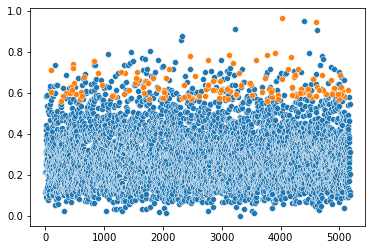

In [3]:
total_anoamlies = 130
model = load('../output/model/census2/clf_autoencoder_2.joblib')
df_normal = pd.read_csv('../output/dataset/census2/x_test.csv')
df_anomalous = pd.read_csv('../output/dataset/census2/x_test.csv')
anomaly_desciption = 'Features age=78, education=16, education_num=1 were set to give most distance from their neighbours.'
df_anomalous['workclass'] = 79
df_anomalous['hours_per_week'] = 1
df_anomalous['sex'] = 19
x_anomalous = df_anomalous.sample(n=total_anoamlies)

# Started writing
if False:
    dataset_path = '../output/anomaly_included/census/'
    anomaly_type = 'distance'
    anomaly_name = '_age_educationnum_education_sex/'
    anomaly_path = dataset_path + anomaly_type + anomaly_name
    os.makedirs(anomaly_path, exist_ok=True)
    with open(anomaly_path + 'readme.txt', 'w') as f:
        f.write(anomaly_desciption)

    # Train set
    shutil.copyfile('../output/dataset/census2/x_train.csv', anomaly_path + '/x_train.csv')

    # Antoine's set
    df_normal[:1000].to_csv(anomaly_path + 'x_test_antoine.csv')
    # Test set
    df_normal[1000:].to_csv(anomaly_path + 'x_test.csv')
    # Anomalies
    x_anomalous[:100].to_csv(anomaly_path + 'anoamlous_data.csv')
    # Anomalies Antoine
    x_anomalous[100:].to_csv(anomaly_path + 'anoamlous_data_antoine.csv')


x_anomalous = x_anomalous.to_numpy()
x_normal = df_normal.to_numpy()
# x_anomalous = df_anomalous.to_numpy()
score_normal = model.predict_proba(x_normal)[:,1]
randomlist = random.sample(range(0, len(score_normal)), total_anoamlies)
# x_anomalous = np.loadtxt('age_hpw_anomaly.txt', dtype=int)
score_anomalous = model.predict_proba(x_anomalous)[:,1]
print(score_anomalous, score_normal)
sns.scatterplot(y=score_normal, x=list(range(len(score_normal))))
sns.scatterplot(y=score_anomalous, x=randomlist)
# print(model.predict_proba(x_normal))
# print(model.predict_proba(np.zeros(len(x_normal[0])).reshape(1,-1)))